# This is an Ipython Notebook accompanying the submission of Merdith et al. 2016

#### This notebook allows a user to extract kinematic data (spreading rates, angular rotation, flowlines, mid-ocean ridge orientation) from a tectonic reconstruction.  Some familiarity with the Python programming language is recommended and some common Python plugin's are also required.

In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from Utilities import poles_of_rotation, plotting_geometries, wrapping_polysomethings
%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##### Set parameters for the kinematic data extraction, this is where a user changes their rotation file, flowlines and geometries

In [61]:
rotation_filename = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Rotations_for_publication/Gondwana-convergence.rot'
topology_filename = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Geometries_Australia_India.gpml'
gondwana_topology_filename = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Geometries_Gondwana_Laurentia_no_china.gpml'
motion_path_filename_1 = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Motion_Paths/India-Aus_MP.gpml'
motion_path_filename_2 = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Motion_Paths/India-Gond_MP.gpml'

In [70]:
rotation_model = pygplates.RotationModel(rotation_filename)
topology_features = pygplates.FeatureCollection(topology_filename)
gondwana_features = pygplates.FeatureCollection(gondwana_topology_filename)
motion_path_feature_1 = pygplates.FeatureCollection(motion_path_filename_1)
motion_path_feature_2 = pygplates.FeatureCollection(motion_path_filename_2)

# Create the shape of the motion path
reconstructed_motion_paths_1 = []
reconstructed_motion_paths_2 = []
pygplates.reconstruct(motion_path_feature_1, 
                      rotation_model, 
                      reconstructed_motion_paths_1, 
                      reconstruction_end_time,
                      reconstruct_type=pygplates.ReconstructType.motion_path)
pygplates.reconstruct(motion_path_feature_2, 
                      rotation_model, 
                      reconstructed_motion_paths_2, 
                      reconstruction_end_time,
                      reconstruct_type=pygplates.ReconstructType.motion_path)

In [71]:
CList_1 = ['#671934','#BE7C4D'] #red, orange
CList_2 = ['#447604','#3A7CA5'] #green, orange

In [72]:
reconstructed_motion_paths_1

In [73]:
reconstructed_motion_paths_2

In [85]:
#extract values for plotting
lats_650, longs_650, all_reconstructed_points_650 = plotting_geometries(rotation_model, 
                                                                        topology_features, 
                                                                        Start_time_1, 
                                                                        TimeStep) #geometry positions at end time 
lats_700, longs_700, all_reconstructed_points_700 = plotting_geometries(rotation_model, 
                                                                        topology_features, 
                                                                        Start_time_2, 
                                                                        TimeStep) #geometry positions at end time 

gondwana_lats_520, gondwana_longs_520, gondwana_all_reconstructed_points_520 = plotting_geometries(rotation_model, 
                                                                        gondwana_features, 
                                                                        reconstruction_end_time_1, 
                                                                        TimeStep) #geometry positions at end time 

gondwana_lats_540, gondwana_longs_540, gondwana_all_reconstructed_points_540 = plotting_geometries(rotation_model, 
                                                                        gondwana_features, 
                                                                        reconstruction_end_time_2, 
                                                                        TimeStep) #geometry positions at end time 

In [86]:
def plotting_polysomethings(poly_lats, poly_longs):
    #
    #needs pygplates
    #

    latitudes = np.asarray(poly_lats)
    longitudes = np.asarray(poly_longs)
    return latitudes, longitudes

0
1


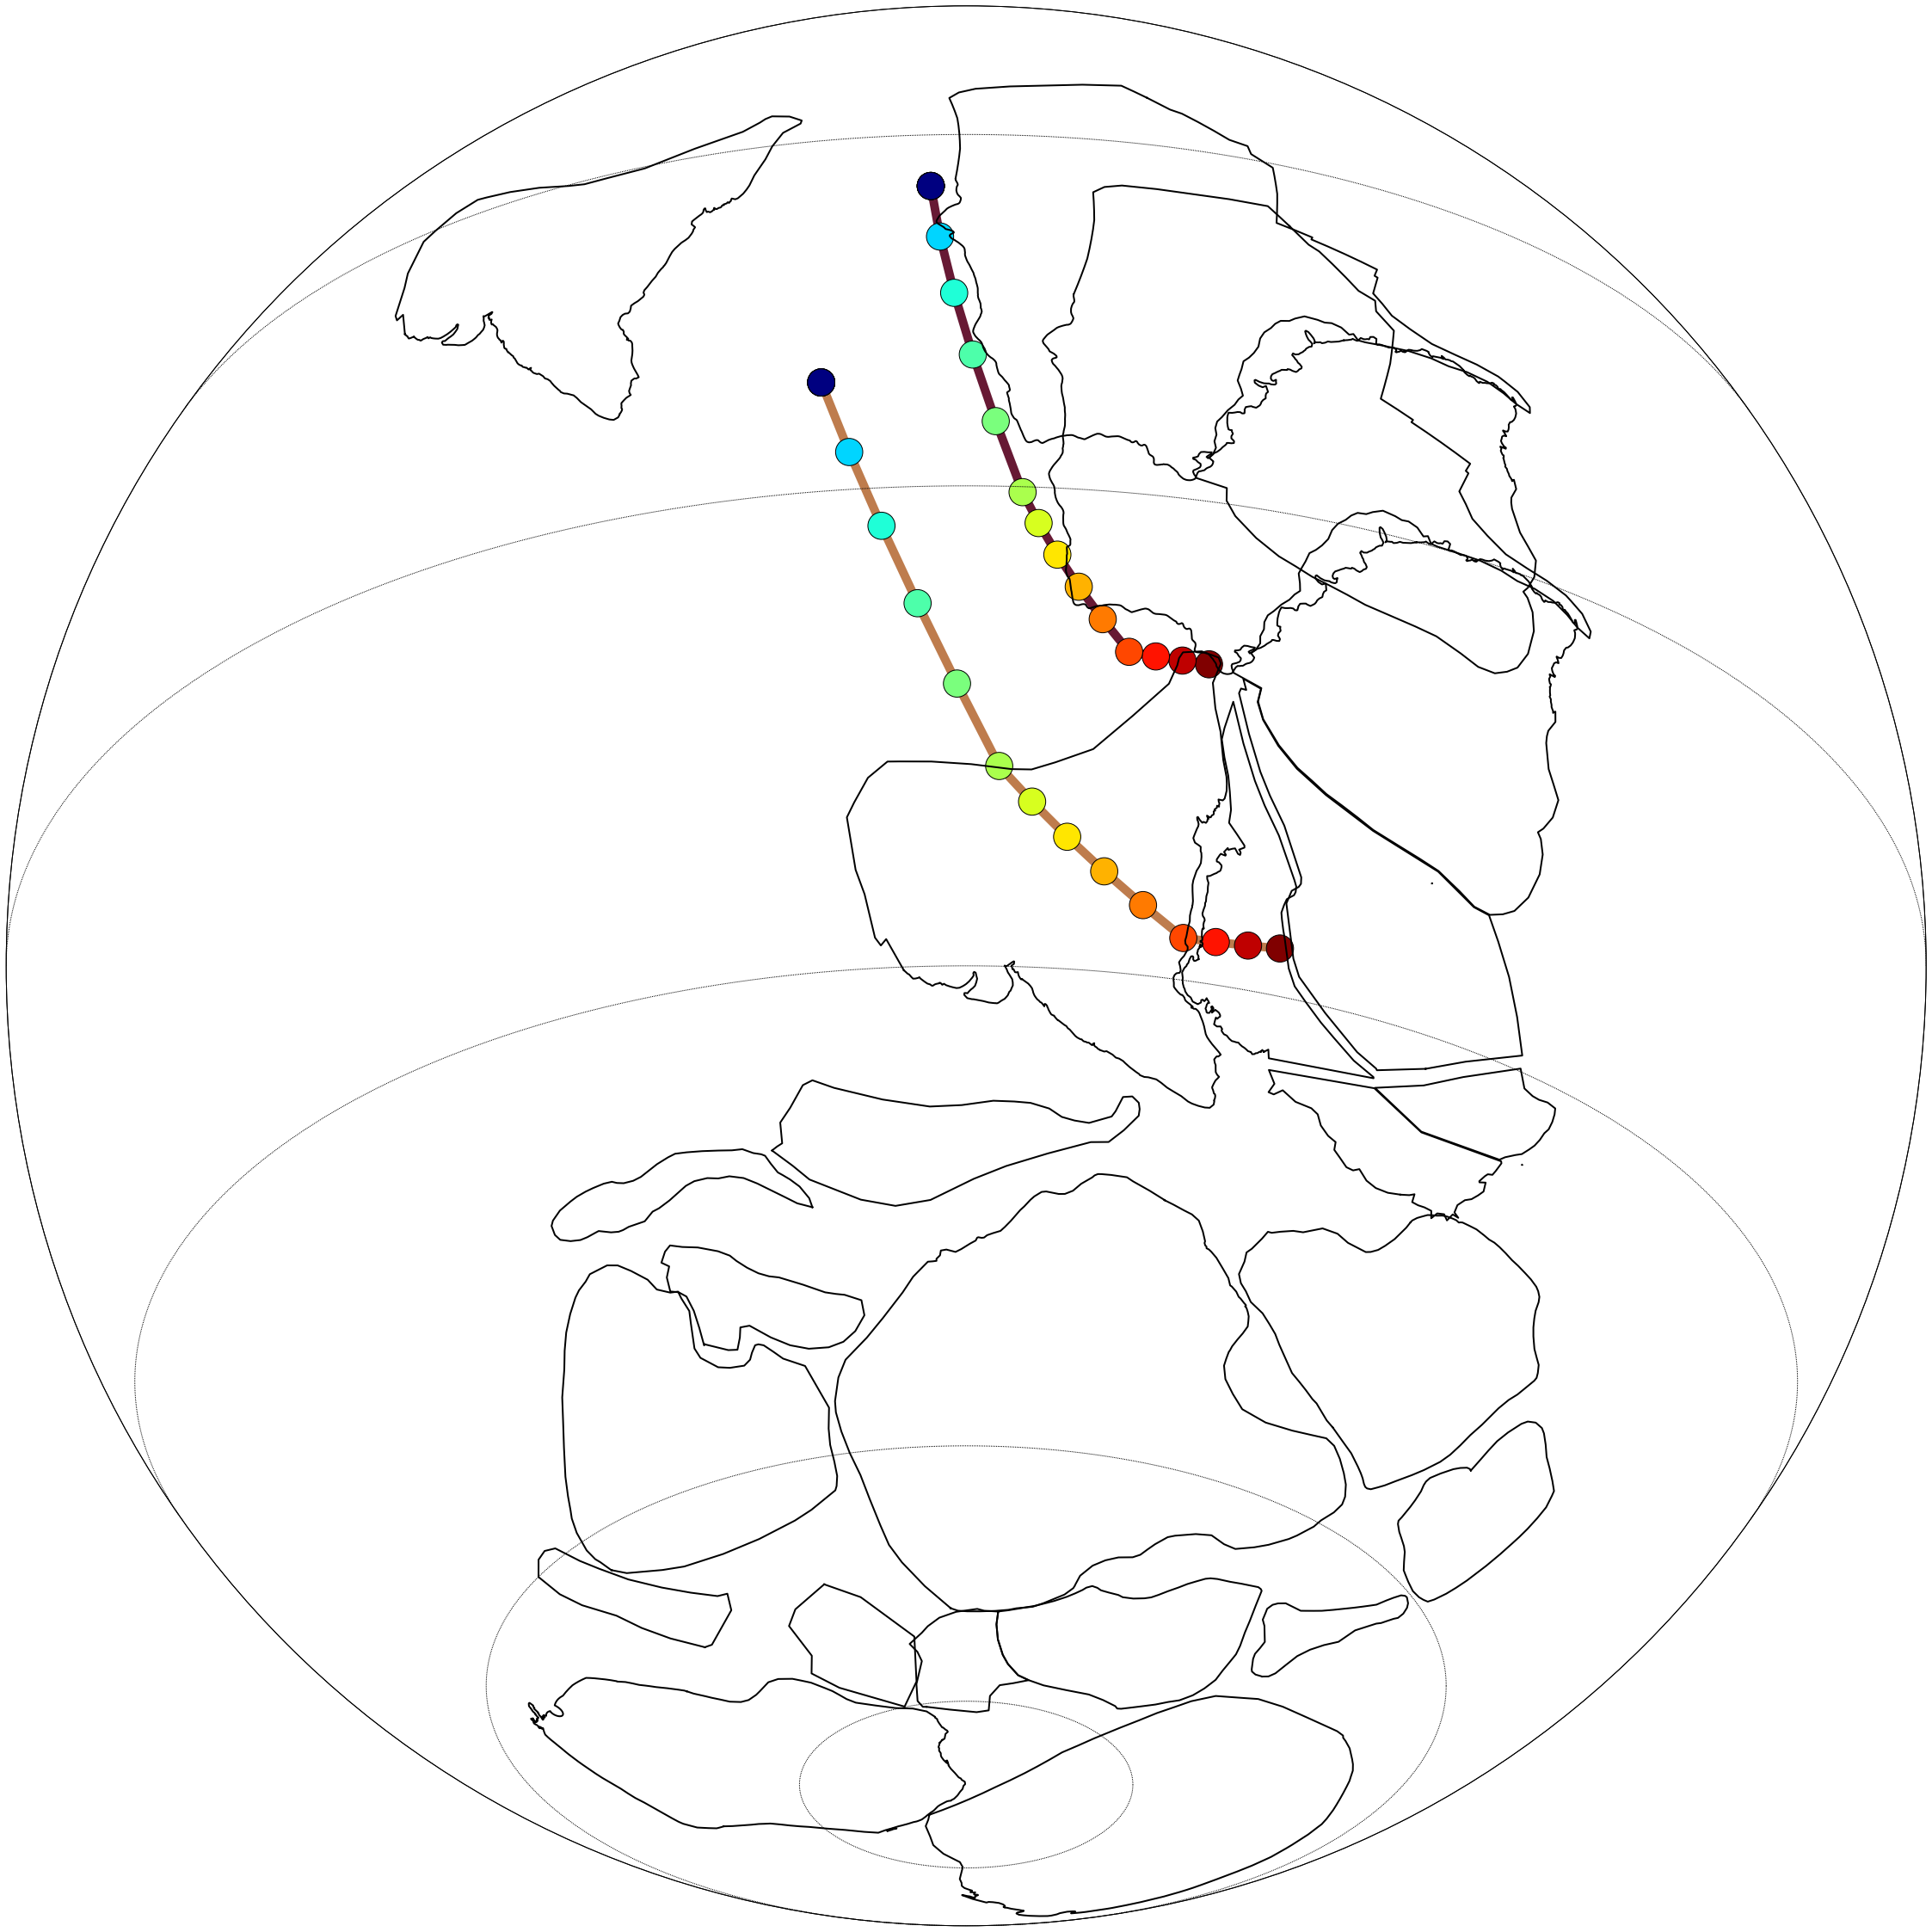

In [87]:
fig = plt.figure(figsize=(40,40),dpi=300)
map_1 = Basemap(projection='ortho',lon_0=80,lat_0=-30,resolution='l')
#map_1.drawmeridians(np.arange(0, 360, 30),labels=[0,0,0,1],fontsize=20)
map_1.drawparallels(np.arange(-90, 90, 30))#, labels=[1,0,0,0],fontsize=20)
clip_path = map_1.drawmapboundary(fill_color='white')
#plt.title('Configuration at rifting time (' + str(rifting_time) +' Ma)', fontsize=title_font_size, y=1.08)

for i,j in zip(lats_650, longs_650):
    latitudes, longitudes = plotting_polysomethings(i, j)

    plt.plot()
    x_geom,y_geom = map_1(longitudes, latitudes)
    map_1.plot(x_geom, y_geom, color='k', linewidth=2)
   

for k,l in zip(gondwana_lats_520, gondwana_longs_520):
    gond_latitudes, gond_longitudes = plotting_polysomethings(k, l)

    plt.plot()
    x_gond_geom,y_gond_geom = map_1(gond_longitudes, gond_latitudes)
    map_1.plot(x_gond_geom, y_gond_geom, color='k', linewidth=2)

count = 0
for reconstructed_motion_path in reconstructed_motion_paths_1:
    trail_1 = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
    
    x, y = map_1(np.flipud(trail_1[:,1]), np.flipud(trail_1[:,0]))
    #map_1.plot(x[0],y[0],'ko')
    map_1.plot(x,y,c=CList_1[count],linewidth=10, zorder=1)
    l1=map_1.scatter(x, y, 1000, marker='o',c=times,cmap=plt.cm.jet_r, clip_path=clip_path, zorder=2)
   
    print count
    count = count+1

#cbar = map_1.colorbar(l1,location='right',pad="5%")
#cbar.ax.tick_params(labelsize=30)
#cbar.set_label('Age (Ma)',fontsize=40)

#fname = 'India-Australia.svg'
#fig.savefig(fname,bbox_inches='tight', dpi=300)

0
1


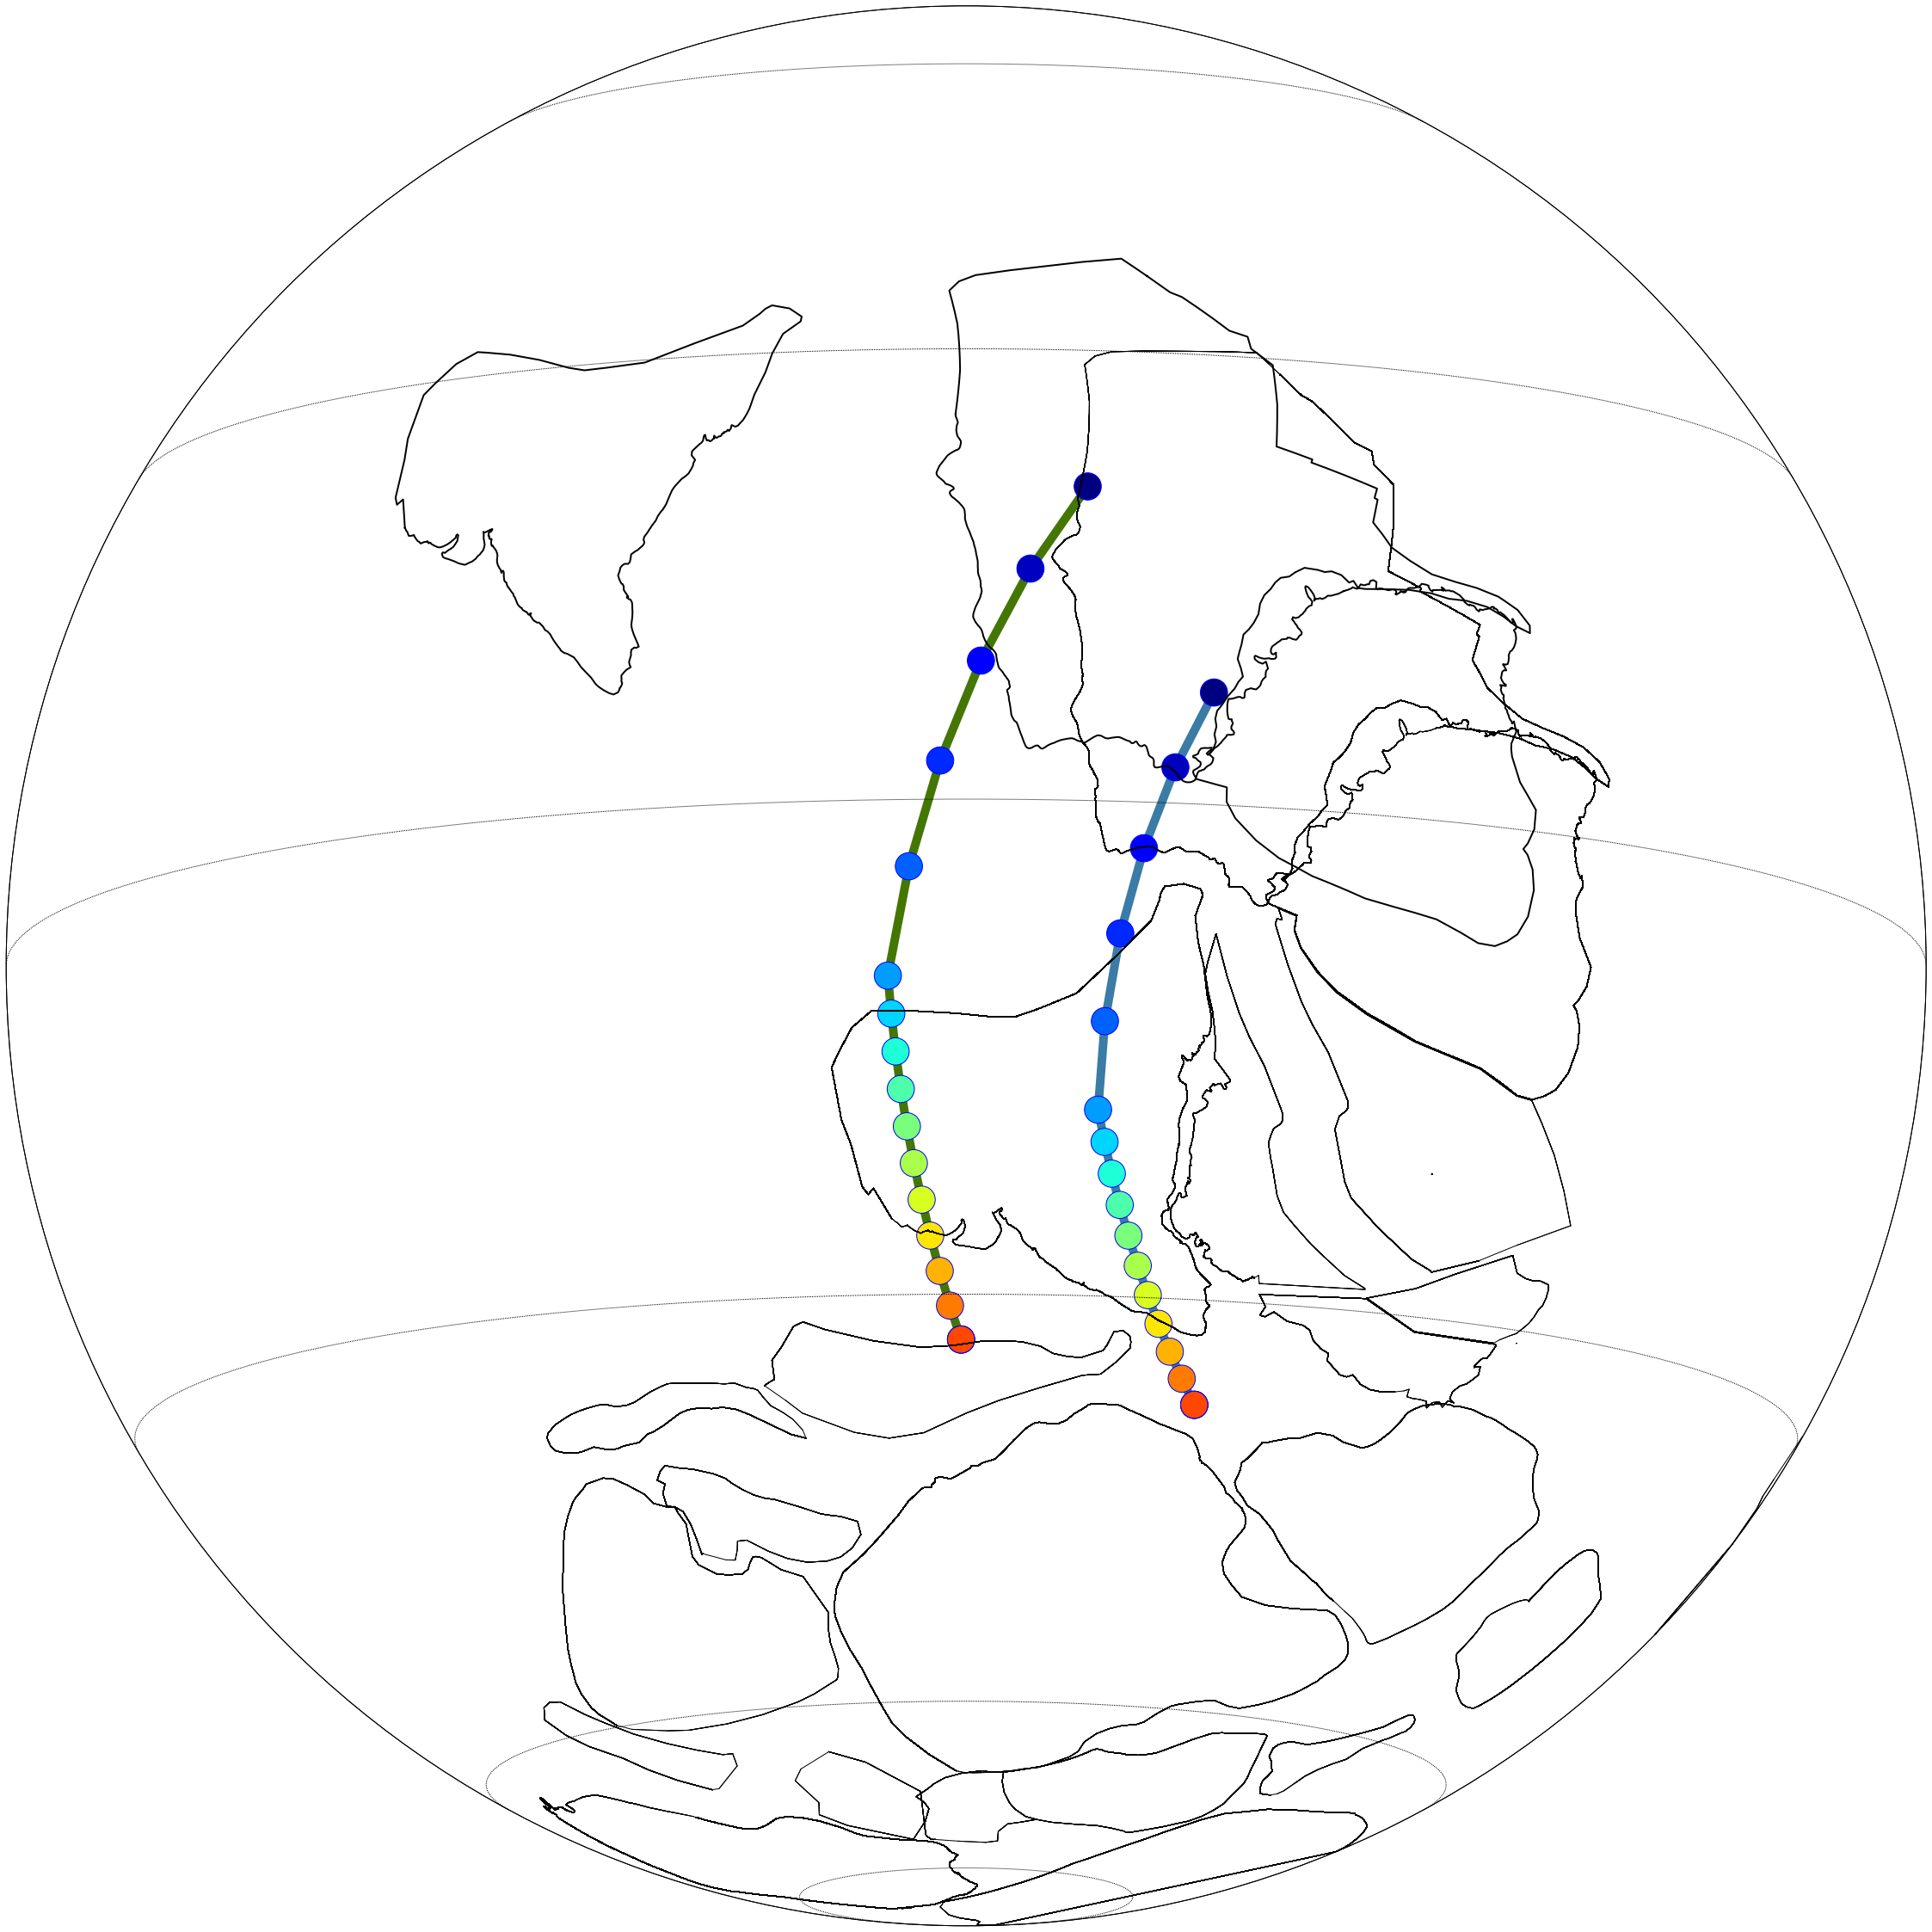

In [91]:
fig = plt.figure(figsize=(40,40),dpi=300)
map_1 = Basemap(projection='ortho',lon_0=80,lat_0=-10,resolution='l')
#map_1.drawmeridians(np.arange(0, 360, 30),labels=[0,0,0,1],fontsize=20)
map_1.drawparallels(np.arange(-90, 90, 30))#, labels=[1,0,0,0],fontsize=20)
clip_path = map_1.drawmapboundary(fill_color='white')
#plt.title('Configuration at rifting time (' + str(rifting_time) +' Ma)', fontsize=title_font_size, y=1.08)


for i,j in zip(lats_650, longs_650):
    latitudes, longitudes = plotting_polysomethings(i, j)

    plt.plot()
    x_geom,y_geom = map_1(longitudes, latitudes)
    map_1.plot(x_geom, y_geom, color='k', linewidth=2)

for i,j in zip(gondwana_lats_540, gondwana_longs_540):
    latitudes, longitudes = plotting_polysomethings(i, j)

    plt.plot()
    x_geom,y_geom = map_1(longitudes, latitudes)
    x_geom_1 = []
    y_geom_1 = []
    for x_geom, y_geom in zip(x_geom, y_geom):
        if x_geom < 400000000000:
            x_geom_1.append(x_geom)
            y_geom_1.append(y_geom)
            map_1.plot(x_geom_1, y_geom_1, color='k', linewidth=1)

count = 0
for reconstructed_motion_path in reconstructed_motion_paths_2:
    trail_2 = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
    
    x, y = map_1(np.flipud(trail_2[:,1]), np.flipud(trail_2[:,0]))
    #map_1.plot(x[0],y[0],'ko')
    map_1.plot(x,y,c=CList_2[count],linewidth=10, zorder=1)
    l1=map_1.scatter(x, y, 1000, marker='o',c=times,cmap=plt.cm.jet_r, edgecolor='b', clip_path=clip_path, zorder=2)
   
    print count
    count = count+1
    
#cbar = map_1.colorbar(l1,location='right',pad="5%")
#cbar.ax.tick_params(labelsize=70)
#cbar.set_label('Age (Ma)',fontsize=100)

fname = 'India-Congo.svg'
fig.savefig(fname,bbox_inches='tight', dpi=300)

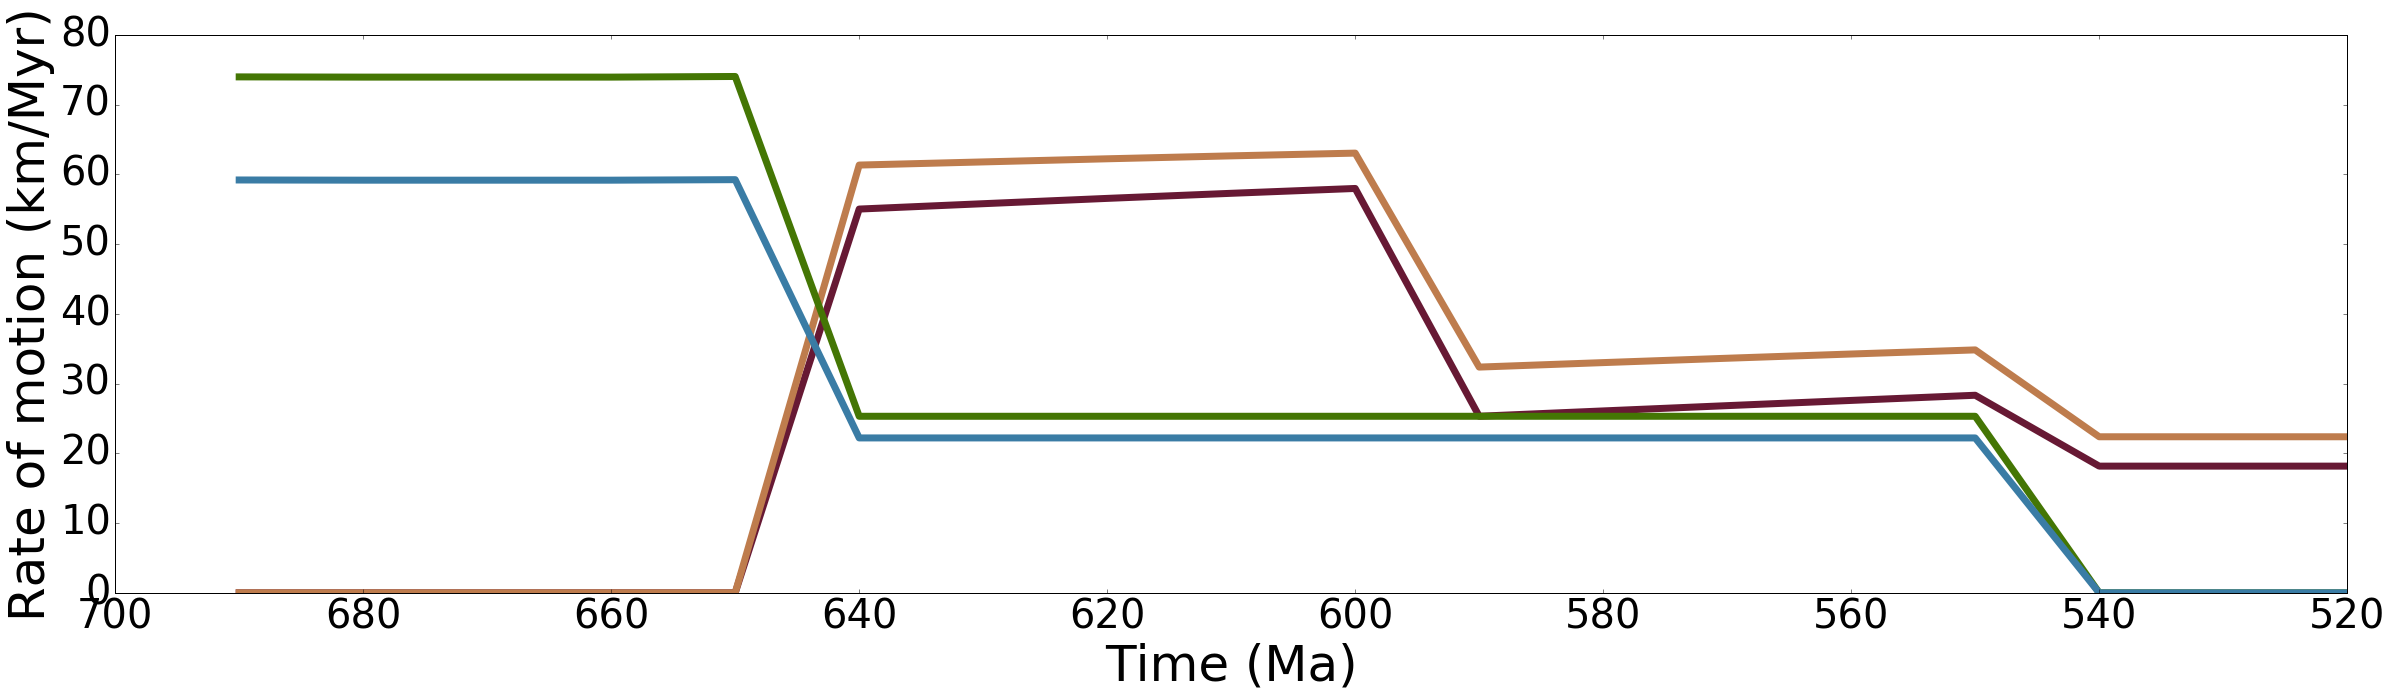

In [80]:
# Iterate over each segment in the reconstructed motion path, get the distance travelled by the moving
# plate relative to the fixed plate in each time step

fig = plt.figure(figsize=(40,10))
count = 0

for reconstructed_motion_path in reconstructed_motion_paths_1:
    Dist_1 = []
    for segment in reconstructed_motion_path.get_motion_path().get_segments():
        Dist_1.append(segment.get_arc_length()*pygplates.Earth.mean_radius_in_kms)
        
    Rate_1 = np.asarray(Dist_1)/TimeStep
    Rate_1 = np.flipud(Rate_1)
    plt.plot(times[:-1],Rate_1,c=CList_1[count], linewidth=7)
    count = count+1
        
count = 0

for reconstructed_motion_path in reconstructed_motion_paths_2:
    Dist_2 = []
    for segment in reconstructed_motion_path.get_motion_path().get_segments():
        Dist_2.append(segment.get_arc_length()*pygplates.Earth.mean_radius_in_kms)

    Rate_2 = np.asarray(Dist_2)/TimeStep
    Rate_2 = np.flipud(Rate_2)
    plt.plot(times[:-1],Rate_2,c=CList_2[count], linewidth=7)
    count = count+1

plt.xlabel('Time (Ma)', fontsize=50)
plt.ylabel('Rate of motion (km/Myr)', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.gca().invert_xaxis()
plt.show()

fname = 'India convergence paths_2.svg'
fig.savefig(fname,bbox_inches='tight', dpi=300)

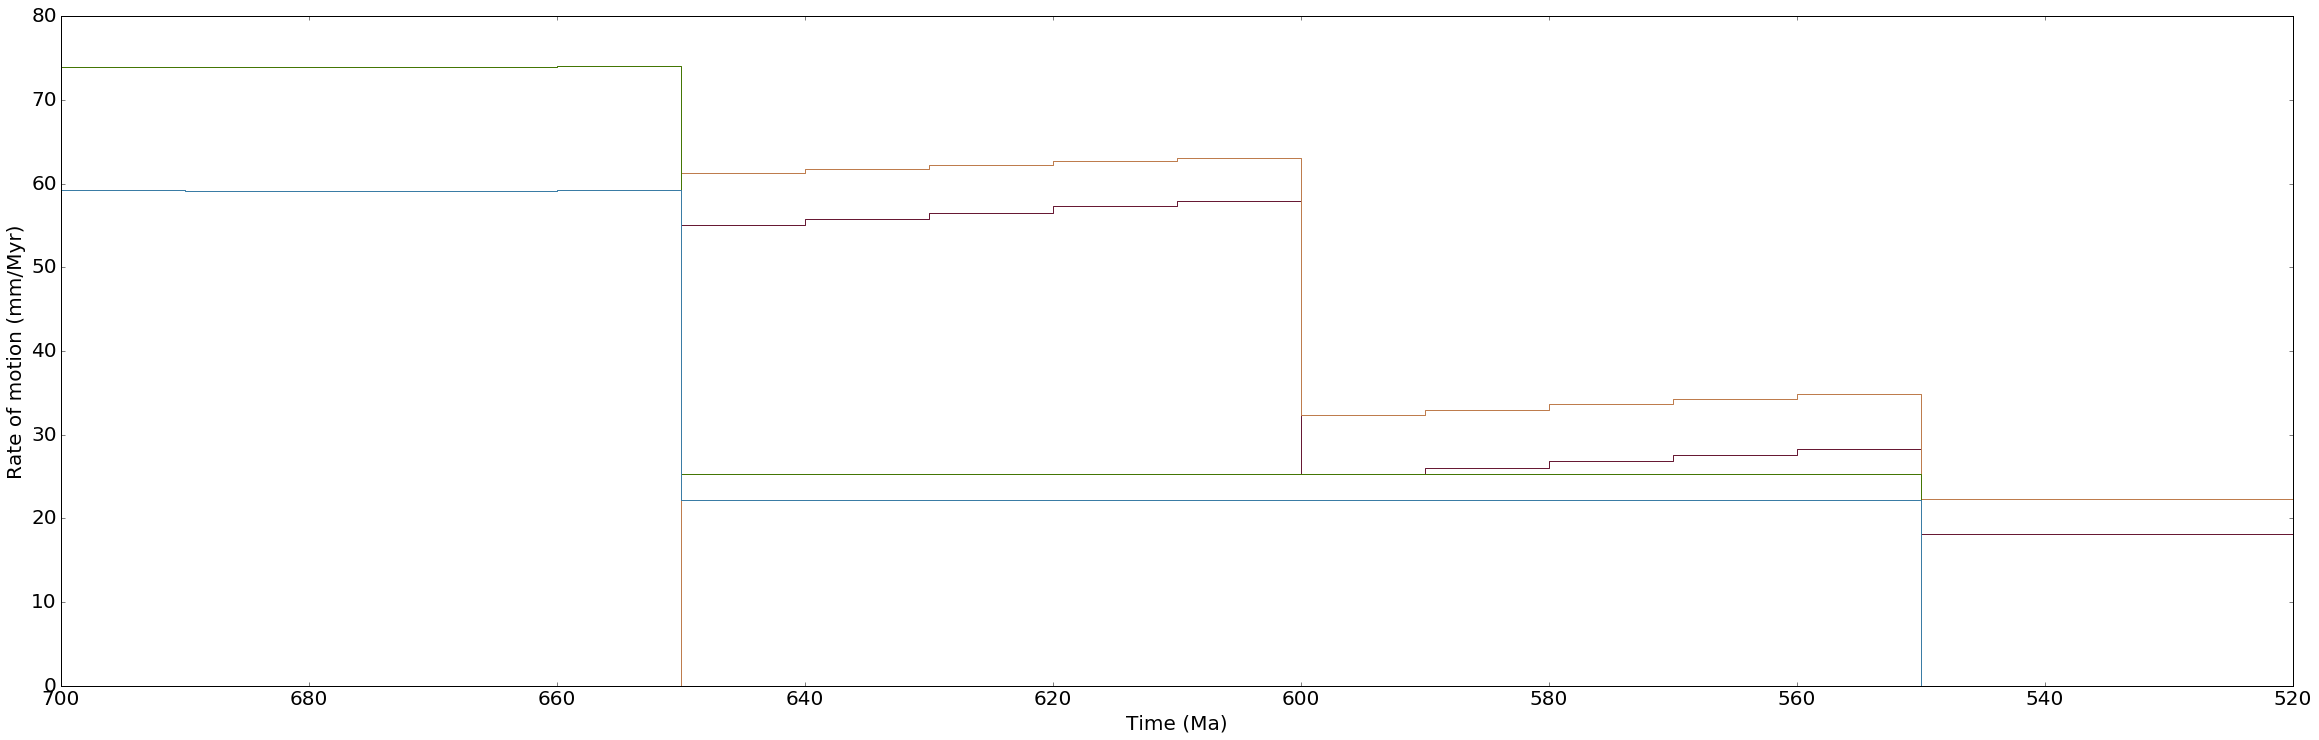

In [23]:
fig = plt.figure(figsize=(40,12))

count = 0

for reconstructed_motion_path in reconstructed_motion_paths_1:
    Dist_1 = []
    for segment in reconstructed_motion_path.get_motion_path().get_segments():
        Dist_1.append(segment.get_arc_length()*pygplates.Earth.mean_radius_in_kms)
        
    Rate_1 = np.asarray(Dist_1)/TimeStep
    Rate_1 = np.flipud(Rate_1)
    
    StepRate_1 = np.zeros(len(Rate_1)*2)
    StepRate_1[::2] = Rate_1
    StepRate_1[1::2] = Rate_1
    
    StepTime = np.zeros(len(Rate_1)*2)
    StepTime[::2] = times[:-1]
    StepTime[1::2] = times[1:]

    plt.plot(StepTime,StepRate_1,c=CList_1[count])
    count = count+1
        
count = 0

for reconstructed_motion_path in reconstructed_motion_paths_2:
    Dist_2 = []
    for segment in reconstructed_motion_path.get_motion_path().get_segments():
        Dist_2.append(segment.get_arc_length()*pygplates.Earth.mean_radius_in_kms)
        
    Rate_2 = np.asarray(Dist_2)/TimeStep
    Rate_2 = np.flipud(Rate_2)

    StepRate_2 = np.zeros(len(Rate_2)*2)
    StepRate_2[::2] = Rate_2
    StepRate_2[1::2] = Rate_2

    plt.plot(StepTime,StepRate_2,c=CList_2[count])
    count = count+1
        
plt.xlabel('Time (Ma)', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Rate of motion (mm/Myr)', fontsize=20)
plt.yticks(fontsize=20)
plt.gca().invert_xaxis()
plt.show()

#fname = 'India convergence paths.svg'
#fig.savefig(fname,bbox_inches='tight', dpi=300)

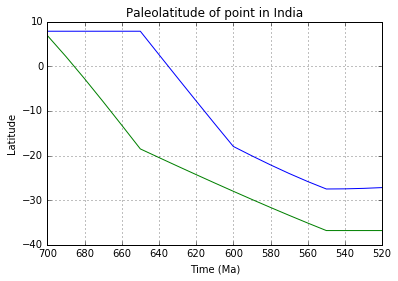

In [24]:
plt.plot(times,np.flipud(trail_1[:,0]))
plt.plot(times,np.flipud(trail_2[:,0]))
plt.title('Paleolatitude of point in India')
plt.xlabel('Time (Ma)')
plt.ylabel('Latitude')
plt.gca().grid()
plt.gca().invert_xaxis()
plt.show()